<a href="https://colab.research.google.com/github/CaptaiN785/ML-Notebooks/blob/main/--Time-Series--/fbprohet_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
## Dataset link
!wget https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/monthly-milk-production-pounds.csv

--2022-07-22 18:43:19--  https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/monthly-milk-production-pounds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2478 (2.4K) [text/plain]
Saving to: ‘monthly-milk-production-pounds.csv.1’

monthly-milk-produc 100%[===================>]   2.42K  --.-KB/s    in 0s      

2022-07-22 18:43:19 (51.1 MB/s) - ‘monthly-milk-production-pounds.csv.1’ saved [2478/2478]



In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fbprophet

In [73]:
df = pd.read_csv("monthly-milk-production-pounds.csv")
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [74]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [75]:
df.drop(168, axis = 0, inplace = True)

In [76]:
df.tail(2)

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
166,1975-11,797.0
167,1975-12,843.0


In [77]:
df.columns = ["date", "y"]
df.head()

,date,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [78]:
df['date'] = pd.to_datetime(df['date'])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    168 non-null    datetime64[ns]
 1   y       168 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


In [80]:
df.head(2)

,date,y
0,1962-01-01,589.0
1,1962-02-01,561.0


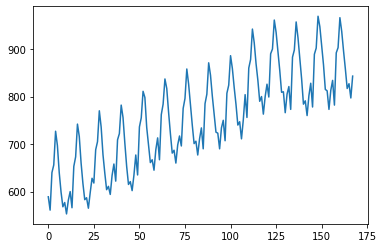

In [81]:
df['y'].plot()

In [82]:
## It is a seasonal data
## Now let's convert it into seasonal data
## Trying the dickey fuller test
from statsmodels.tsa.stattools import adfuller
def test_data(data):
    result = adfuller(data)
    print(f"ADF statistics values : {result[0]}")
    print(f"p-value is : {result[1]}")
    if result[1] <= 0.5:
        print("Data is stationary")
    else:
        print("Data is not stationary")

In [83]:
test_data(df['y'])

ADF statistics values : -1.3038115874221246
p-value is : 0.627426708603034
Data is not stationary


In [84]:
## Now differencing the data
df['diff_1'] = df['y'] - df['y'].shift(1)


In [85]:
test_data(df['diff_1'].dropna())

ADF statistics values : -3.0549955586531095
p-value is : 0.0300680040017824
Data is stationary


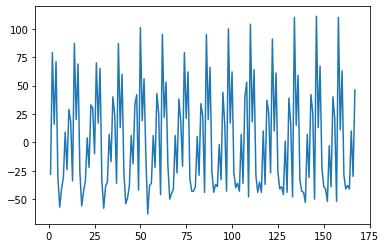

In [86]:
## Now data is stationary
df['diff_1'].plot()

In [87]:
## Now applying the model
from fbprophet import Prophet

In [88]:
model = Prophet()
dir(model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'changepoint_prior_scale',
 'changepoint_range',
 'changepoints',
 'changepoints_t',
 'component_modes',
 'construct_holiday_dataframe',
 'country_holidays',
 'daily_seasonality',
 'extra_regressors',
 'fit',
 'fit_kwargs',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'growth',
 'history',
 'history_dates',
 'holidays',
 'holidays_prior_scale',
 'initialize_scales',
 'interval_width',
 'linear_growth_init',
 'logistic_floor',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataf

In [89]:
## Here this model need date as ds columns and variable as y
## rename the columns
df.rename({'date':'ds'}, inplace = True, axis = 1)
df.head()

,ds,y,diff_1
0,1962-01-01,589.0,NaN
1,1962-02-01,561.0,-28.0
2,1962-03-01,640.0,79.0
3,1962-04-01,656.0,16.0
4,1962-05-01,727.0,71.0


In [90]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [91]:
model.seasonalities

OrderedDict([('yearly',
              {'condition_name': None,
               'fourier_order': 10,
               'mode': 'additive',
               'period': 365.25,
               'prior_scale': 10.0})])

In [92]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [93]:
df.tail()

,ds,y,diff_1
163,1975-08-01,858.0,-38.0
164,1975-09-01,817.0,-41.0
165,1975-10-01,827.0,10.0
166,1975-11-01,797.0,-30.0
167,1975-12-01,843.0,46.0


In [94]:
## Now its time to forecast so we wiil create a dataframe of next days
## Here freq is M because it is a monthly data
future_months = model.make_future_dataframe(periods=24, freq='M')

In [95]:
## Now future months is created
prediction = model.predict(future_months)

In [96]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.941323,576.548556,597.013113,606.941323,606.941323,-20.151798,-20.151798,-20.151798,-20.151798,-20.151798,-20.151798,0.0,0.0,0.0,586.789525
1,1962-02-01,608.656256,536.222777,555.587756,608.656256,608.656256,-62.588619,-62.588619,-62.588619,-62.588619,-62.588619,-62.588619,0.0,0.0,0.0,546.067637
2,1962-03-01,610.205228,631.736314,652.268610,610.205228,610.205228,31.365739,31.365739,31.365739,31.365739,31.365739,31.365739,0.0,0.0,0.0,641.570967
3,1962-04-01,611.920161,648.946288,668.768010,611.920161,611.920161,46.703773,46.703773,46.703773,46.703773,46.703773,46.703773,0.0,0.0,0.0,658.623935
4,1962-05-01,613.579774,711.629111,731.771572,613.579774,613.579774,108.040207,108.040207,108.040207,108.040207,108.040207,108.040207,0.0,0.0,0.0,721.619981


In [97]:
pred = prediction[['ds', 'yhat_lower', 'yhat_upper', 'yhat']]
pred.head()
## Here yhat is predicted value and yhat_lower and yhat_upper is range of prediction

,ds,yhat_lower,yhat_upper,yhat
0,1962-01-01,576.548556,597.013113,586.789525
1,1962-02-01,536.222777,555.587756,546.067637
2,1962-03-01,631.736314,652.268610,641.570967
3,1962-04-01,648.946288,668.768010,658.623935
4,1962-05-01,711.629111,731.771572,721.619981


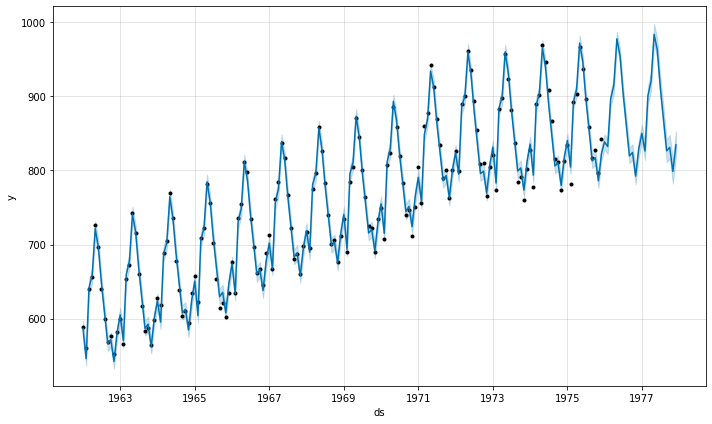

In [98]:
# Now plotting the prediction projection
plot = model.plot(prediction)

In [99]:
## Here dot is real data of our datasets
## and blue lines is predicted values
## Light blue shaded region at bottom of graph is trend of data

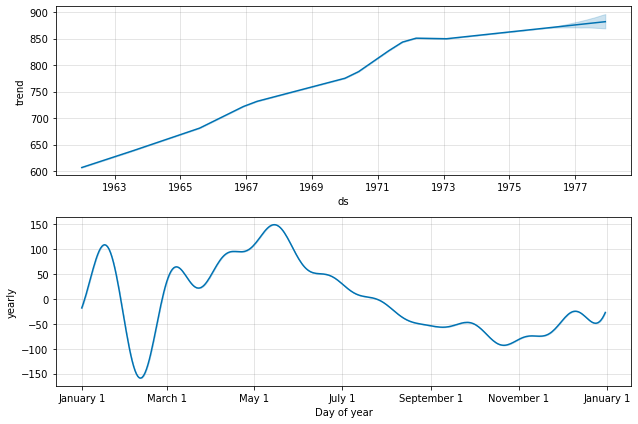

In [100]:
## Visualize the each component trends, weekly
comp1 = model.plot_components(prediction)

## Cross validation

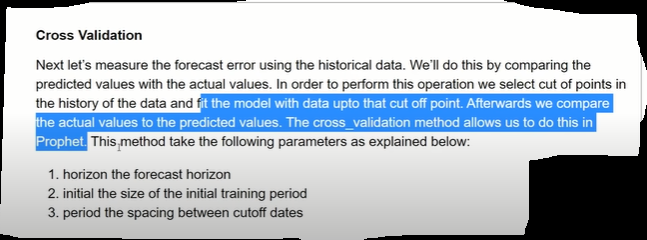

In [101]:
 from fbprophet.diagnostics import cross_validation

In [102]:
df.shape

(168, 3)

Parameters

* model: Prophet class object. Fitted Prophet model.
* horizon: string with pd.Timedelta compatible style, e.g., '5 days',<br>
    '3 hours', '10 seconds'.
* period: string with pd.Timedelta compatible style. Simulated forecast will<br>
    be done at every this period. If not provided, 0.5 * horizon is used.
* initial: string with pd.Timedelta compatible style. The first training<br>
    period will include at least this much data. If not provided,
    3 * horizon is used.
* cutoffs: list of pd.Timestamp specifying cutoffs to be used during<br>
    cross validtation. If not provided, they are generated as described
    above.
* parallel : {None, 'processes', 'threads', 'dask', object}<br>
    How to parallelize the forecast computation. By default no parallelism
    is used.

In [103]:
df_cv = cross_validation(model,horizon = '365 days', period = '180 days', initial='1095 days')

INFO:fbprophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00


  0%|          | 0/21 [00:00<?, ?it/s]

In [104]:
## It work in such a way
# if we give the data like 1965 - 1968
# 1965-1966 > Training data
# 1966-1967 > Test data
# 1967-1968 > validation data

In [105]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,630.734519,629.004576,632.391818,622.0,1965-01-22
1,1965-03-01,715.209269,709.232109,721.204393,709.0,1965-01-22
2,1965-04-01,738.046179,725.719880,750.251026,722.0,1965-01-22
3,1965-05-01,809.508773,789.440121,829.173800,782.0,1965-01-22
4,1965-06-01,778.278652,750.311771,808.616920,756.0,1965-01-22


In [106]:
df_cv.shape

(252, 6)

In [107]:
## Now computing the performance metrics
from fbprophet.diagnostics import performance_metrics

In [108]:
perf_df = performance_metrics(df_cv)

In [109]:
perf_df

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,255.110328,15.972174,12.522709,0.016138,0.014043,0.32
1,41 days,253.085086,15.908648,12.440669,0.016069,0.014043,0.32
2,42 days,267.466632,16.354407,12.890051,0.016696,0.014071,0.32
3,43 days,267.960409,16.369496,13.005926,0.016878,0.014071,0.32
4,46 days,252.637615,15.894578,12.615442,0.016331,0.014071,0.32
...,...,...,...,...,...,...,...
180,357 days,884.015365,29.732396,22.644878,0.028549,0.023298,0.40
181,360 days,690.792073,26.282924,19.536284,0.024325,0.017204,0.44
182,361 days,678.229374,26.042837,19.143664,0.023926,0.013927,0.44
183,362 days,661.483112,25.719314,18.431256,0.023110,0.013880,0.48


In [110]:
## Now let's plot cross validation plot
from fbprophet.plot import plot_cross_validation_metric

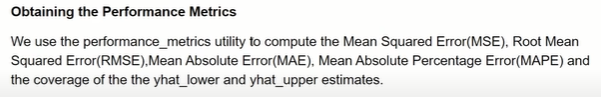

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


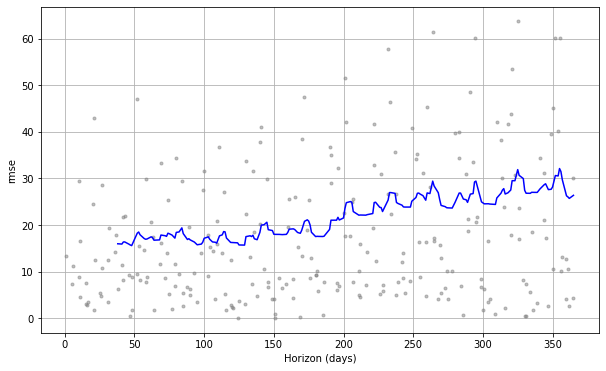

In [111]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [112]:
## It is the trend made using the rmse metrics

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


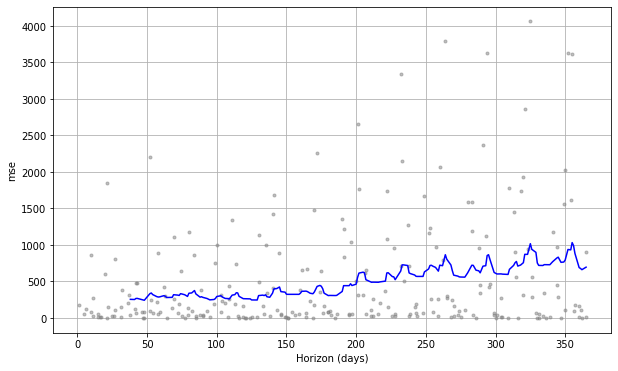

In [113]:
fig1 = plot_cross_validation_metric(df_cv, metric='mse')